# Heart Disease Data

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

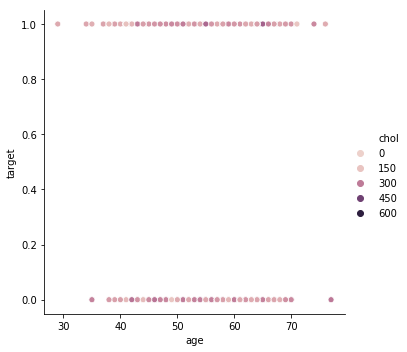

In [20]:
sns.relplot(x = 'age', y = 'target', hue = 'chol', data = df)

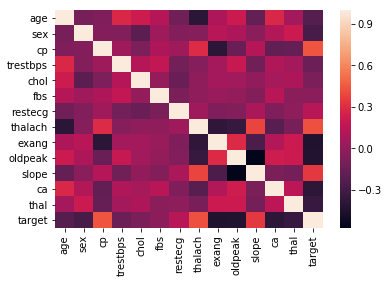

In [22]:
sns.heatmap(data=df.corr())

In [25]:
x = df.drop(['target'],axis=1)
y = df['target']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0)

In [37]:
model_svm = SVC(kernel = 'linear')

In [38]:
model_svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
model_svm.score(x_test,y_test)

0.8131868131868132

In [40]:
model_svmp = SVC(kernel = 'poly')

In [41]:
model_svmp.fit(x_train,y_train)

/home/gautham/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
model_svmp.score(x_test,y_test)

0.7582417582417582

## Decision Tree

In [66]:
acc = {}

for i in range(1,51):
    model_dtc = dtc(max_depth = i)
    model_dtc.fit(x_train,y_train)
    acc.update({i:model_dtc.score(x_test,y_test)})

In [68]:
for i,j in acc.items():
    if j == max(acc.values()):
        print(i)

3
